In [2]:
import numpy as np
import pandas as pd
from scipy import stats as sts
from scipy import optimize as opt
import matplotlib.pyplot as plt
import math
%matplotlib inline

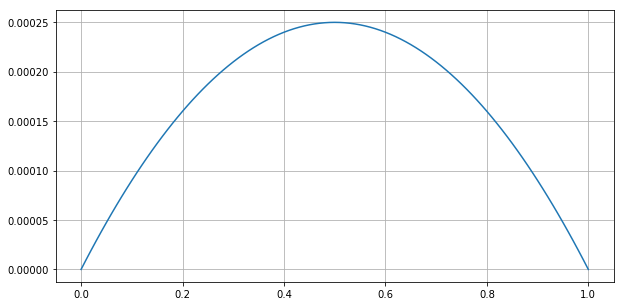

In [4]:
# Сетка значений параметра
TH = np.linspace(0, 1, 101)
n = 1000
K = 500
# Нижняя оценка дисперсии для выборки размера n из биномиального распределения с параметром th
def disp_var(n, th):
    return (th*(1-th)) / n
# Построим график зависимости нижней оценки дисперсии несмещенной оценки
# из неравенства Рао-Крамера от θ для выборки размера n
plt.figure(figsize=(10, 5))
plt.plot(TH, disp_var(n, TH))
plt.grid()

Видим, что максимум нижней оценки дисперсии дистигается при вероятности равной 0.5, что логично, учитывая смысл биномиального распределения и его симметричность относительно успеха-не успеха.

In [5]:
%%time
butst_ests = []
# Для каждого значения параметра из сетки
for th in TH:
    # Генерируем выборку размера n
    Bern = sts.bernoulli.rvs(p=th, size=n)
    # Считаем эффективную оценку параметра
    eff_est = np.mean(Bern)
    # И бутстрепную оценку дисперсии
    butst_ests.append(np.array(list(map(lambda k: np.mean(sts.bernoulli.rvs(p=eff_est, size=n)), range(K) ))).var() )

CPU times: user 5.54 s, sys: 0 ns, total: 5.54 s
Wall time: 5.54 s


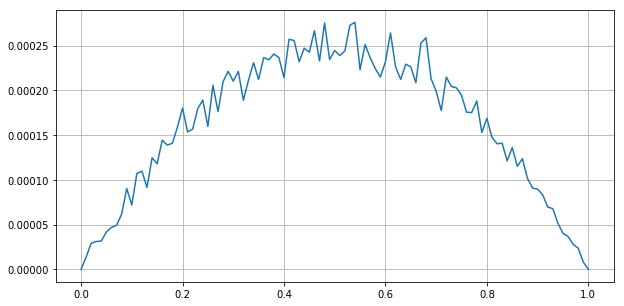

In [6]:
# Построим график зависимости полученных бутстрепных оценок от θ.
plt.figure(figsize=(10, 5))
plt.plot(TH, butst_ests)
plt.grid()

Видим, что он сильно похож на график нижней оценки дисперсии, из чего можно сделать вывод, что наша оценка действительно эффективная.